# Training stage

<img src="https://user-images.githubusercontent.com/74012107/131410494-b246ca89-4d64-4c46-b11b-2d140fbb6937.png" width="1100" height="700">

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [2]:
np.random.seed(2021)

In [3]:
# Load datasets from the preprocessing stage
data_train = np.load('DatasetPreprocessed/data_train.npy')
target_train = np.load('DatasetPreprocessed/target_train.npy')

data_validation = np.load('DatasetPreprocessed/data_validation.npy')
target_validation = np.load('DatasetPreprocessed/target_validation.npy')

data_test = np.load('DatasetPreprocessed/data_test.npy')
target_test = np.load('DatasetPreprocessed/target_test.npy')

In [4]:
# Make the model
model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape = data_train.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [5]:
model.summary() # Provides an overview of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 100)       90100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 100)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 100)       0

In [6]:
history = model.fit(data_train, target_train, epochs = 10, validation_data = (data_validation, target_validation)) 

Epoch 1/10
313/313 [==============================] - 253s 807ms/step - loss: 0.2783 - accuracy: 0.8662 - val_loss: 0.1069 - val_accuracy: 0.9613
Epoch 2/10
313/313 [==============================] - 251s 802ms/step - loss: 0.1125 - accuracy: 0.9633 - val_loss: 0.0605 - val_accuracy: 0.9800
Epoch 3/10
313/313 [==============================] - 251s 802ms/step - loss: 0.0865 - accuracy: 0.9724 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 4/10
313/313 [==============================] - 254s 811ms/step - loss: 0.0721 - accuracy: 0.9773 - val_loss: 0.0685 - val_accuracy: 0.9725
Epoch 5/10
313/313 [==============================] - 250s 799ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 6/10
313/313 [==============================] - 254s 813ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0461 - val_accuracy: 0.9812
Epoch 7/10
313/313 [==============================] - 253s 809ms/step - loss: 0.0493 - accuracy: 0.9832 - val_loss: 0.0615 -

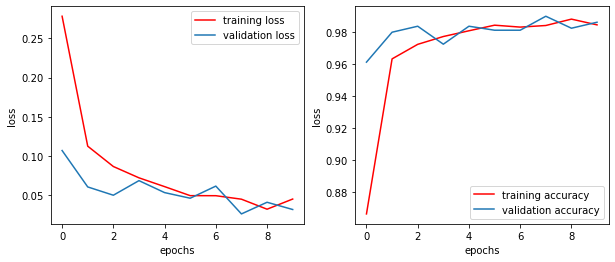

In [7]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'best')

plt.show()

## Evaluate the model

In [8]:
print(model.evaluate(data_test, target_test)) 

31/31 [==============================] - 6s 198ms/step - loss: 0.0357 - accuracy: 0.9879
[0.03571714088320732, 0.9879032373428345]


In [9]:
target_predicted = model.predict(data_test)
target_predicted_classes = np.argmax(target_predicted,axis = 1)
target_test_classes = np.argmax(target_test, axis = 1)

In [10]:
confusion_m = confusion_matrix(target_test_classes,target_predicted_classes)
print('Confusion matrix:\n{}'.format(confusion_m))

Confusion matrix:
[[476   7]
 [  5 504]]


In [11]:
print('Precision score: {}'.format(metrics.precision_score(target_test_classes, target_predicted_classes)))

Precision score: 0.9863013698630136


In [12]:
print('Recall score: {}'.format(metrics.recall_score(target_test_classes, target_predicted_classes)))

Recall score: 0.9901768172888016


In [13]:
print('F1 score: {}'.format(metrics.f1_score(target_test_classes, target_predicted_classes)))

F1 score: 0.9882352941176471


In [14]:
# Classification report
report = classification_report(target_test_classes, target_predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.99      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [15]:
# Save the model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
